In [37]:
# from IPython.display import display, Math, Latex

<script type="text/javascript" async
  src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.2/MathJax.js?config=TeX-MML-AM_CHTML">
</script>

Unsupervised machine learning for unlabelled data have gained much interest by the machine learning community (Markou & Singh, 2003; Chandola et al., 2009, Blanchard et al., 2010; Saligrama & Zhao, 2012; Kloft & Laskov, 2012; Gornitz et al. ¨ , 2014). Wide applications have been developed. For example, the detection of unsignatured attacks and novel intrusions in computer networks (Jyothsna et al.,2011), the systematic anomalies in microarray analysis in computational biology (Noto et al., 2014) and deep sequencing data (Kukita et al., 2013).

Unsupervised machine learning is a type of machine learning algorithm to draw inferences from datasets consisting of input data without labelled responses. Different from supervised learning, unsupervised learning algorithms deal with data that have no explicit labelled responses or target outputs. It may seem somewhat mysterious to imagine what the machine could possibly learn because there is no feedback from its environment. However, it is possible to develop a formal framework based on the notion that the machine’s goal is to find the relationships among the data, or build representations of the input data. In other words, unsupervised learning can be thought of as finding patterns in the data for decision-making or predicting future inputs.

In this chapter we will study the following techniques in detecting outliers. The simpliest way to detect outliers is to work on each feature separately - an univariate approach. Z-sore and Median absolute deviation (MAD) are the two most common techniques.

* Z-score
* Median absolute deviation (MAD)
* One-class Support Vector Machine (One-class SVM)
* Hidden markov model (HMM) 
* Gaussian Mixture Model (GMM)
* Density-based spatial clustering of applications with noise (DBSCAN)
* MeanShift 
* Hierarchical clustering
* Self-organizing maps (SOM)

##### Z-score

The Z-score of a univariate series $X$ is the number of standard deviations between a value and the mean. This method is designed for features that follow a normal distribution.  Assume $\mu$ is the $mean$ and $\delta$ is the standard deviation of $X$, the z-score is defined as: 

$$ z-score(x_i) = \frac{|x_i-\mu|}{\delta}. $$

The critical Z score values when using a 95% confidence level are -1.96 and +1.96 standard deviations, It means one must go 1.96 standard deviations from the mean in both directions to contain 0.95 of the scores. The two functions code zscore_outliers and zscore_outliers2 below return the outliers of the series $X$. 

In [27]:
import numpy as np

def zscore_outliers(X, k=1.96):
    return X[abs(X - np.mean(X)) > k * np.std(X)]

def zscore_outliers2(X, k = 1.96):
    d = np.abs(X - np.mean(X))
    mdev = np.mean(d)
    s = d/(mdev if mdev else 1.)
    return X[s>k]

X = np.array([50,52,51,53,22,51,52,55,52,77])
print(zscore_outliers(X))
print(zscore_outliers2(X))

[22 77]
[22 77]


##### Median absolute deviation (MAD)

The median absolute deviation describes the median of the distance between each data point $x_i$ and the median of the series $X$. 

$$ MAD(X) = median ( x_i - median(X) ) $$

We then use MAD to compute a score $S(x_i)$ showing how different a value is from the others. $S(x_i)$ measures the number of MAD between the median of the series $X$ and the value $x_i$.

$$ S(x_i) = \frac{\ x_i -median(X)}{MAD(X)} $$

Below is a function returning the leftmost and rightmost points that have MAD-denominated distances from centre. Value 77 is 25 times the MAD to the right, and Value 22 is 30 times the MAD to the left of the centre. The MAD clearly differentiates the outliers from the remaining points.

In [23]:
import numpy as np

def MAD_score(X):
    MAD = np.median(abs(X - np.median(X)))
    MAD_score = (X - np.median(X)) /MAD
    print(MAD_score)
    return X[np.isin(MAD_score, [np.min(MAD_score), np.max(MAD_score) ] )] 

X = np.array([50,52,51,53,22,51,52,55,52,77])
print(MAD_score(X))

[ -2.   0.  -1.   1. -30.  -1.   0.   3.   0.  25.]
[22 77]


###### One-class SVM

Suppose you know what the "normal" data look like and you want to know if the new data is similar to the "normal" data, then one-class SVM will do the job. The application is wide in many industries. In medical applications, for example, a doctor may know what healthy (normal) cases look like and want to distinguish the "abnormal" cases from the "normal" cases.

The one class support vector machine was introduced independently by Tax and Duin and Scholkopf et al. as an extension of the support vector machine algorithm. It has gained much popularity in unsupervised learning for high-dimensional data. The one-class SVM first trains the model with normal data. When new data come, the model looks at the relative positions to the "normal" data to determine whether it is "out of class" or not. One-class SVMs will label a normal data point as '1' and the outlier point as -1.

We will explain the SVM first.

[This video clip](https://www.youtube.com/watch?v=3liCbRZPrZA) does a nice job in visualizing the concept. The blue and red dots (image below) are not linearly separably in the bottom 2D plane. But using a polinomial kernel function they can be linearly separated in a 3D space. A kernel function transforms the original data to map into a new space. Thus SVMs can lift the data to a space with a higher dimension where a linear decision boundry can separate classes.

<img src="SVM.png" alt="Drawing" style="width: 400px;"/>

The figure below shows two hyperplanes that can separate both classes which assumed having only two features. In theory there will be many hyperplanes that can separate the two classes. Which hyperplane is the best solution? The best choice will be the hyperplane that leaves the maximum margin from both classes. We can see the green margin is bigger than the red margin, therefore the green hyperplane is the best solution in this case. 

<img src="SVM boundry.png" alt="Drawing" style="width: 400px;"/>

In the following example we first generate 200 points with 5 features as X_train. We also generate data that are far from the norm. 

In [34]:
import numpy as np
from sklearn import svm

# Generate 5 features with 200 data points
X_train = 0.3 * np.random.randn(30, 5)*3 + 5
X_maybe_outliers = 0.3 * np.random.randn(10,5)*3 + 8

We train the model by svm.OneClassSVM:  

In [35]:
# Train the model with the normal data
clf_rbf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

OneClassSVM accepts a few hyperparameters but the most important are nu and kernel; and for the rbf kernel, gamma.

* nu: is the highest percentage of outliers that are expected in the data. Many unsupervised algorithms require you to know or guess the number of outliers. It is a value between 0 and 1. In this example we assume 10%.


* kernel: a kernel function transforms the original data to map into a new space. The default is a non-linear function rgf (radial basis function). The kernel functions can be one of the following: linear, polynomial, rbf, sigmoid:

   * linear: $\langle x, x'\rangle.$
   * polynomial: $(\gamma \langle x, x'\rangle + r)^d.$ d is specified by keyword degree, r by coef0.
   * rbf: $\exp(-\gamma \|x-x'\|^2).$ $\gamma$ is specified by keyword gamma, must be greater than 0.
   * sigmoid ($\tanh(\gamma \langle x,x'\rangle + r))$ , where r is specified by coef0.


* gamma: is only for the rbf kernel. It controls the influence of individual training samples. A low value means the influence of individual points is relatively small, and a high value will result in tight fitting. Some tunning is needed to find the best value.

The one-class SVM algorithm results in 1 for the normal data and -1 for the outliers and 1. Although the training dataset X is considered normal, it still identifies 5 "outliers" away from the main data body. 

In [38]:
y_pred_train = clf.predict(X_train)
y_pred_train

array([ 1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

We also see the stregnth of one-class SVM as a unsupervised technique -- it does not require labelled target points for training. The count statistic is shown below:

In [33]:
unique, counts = np.unique(y_pred_train, return_counts=True)
dict(zip(unique,counts))

{-1: 5, 1: 25}

Now we can use our trained model to detect the new dataset X_outliers which we purposely make them far away from the norm. We expect all the 30 data points will be labelled as outliers. The count statistic below confirms there are 30 outliers identified.

In [29]:
y_pred_outliers = clf.predict(X_outliers)
unique, counts = np.unique(y_pred_outliers, return_counts=True)
dict(zip(unique,counts))

{-1: 30}

###### Hidden markov model (HMM)

HMMs are a statistical model introduced by Baum et al.[9]. 

In our daily life we often see data is in the form of sequences or time series. For example, in medical examiniation the Electrocardiogram (ECG) recordings of the patient is a time series. If we detect anomalies in the time series, we understand there is a problem to the heart's condition. The figure below shows the ECG data of a patient. The red denotes an anomaly because the same low value exists for an abnormally long time (corresponding to an Atrial Premature Contraction). 

<img src="HMM.png" alt="Drawing" style="width: 400px;"/>

It may be very challenging to detect anomalies in a time series. The biggest challenge is we don't know the exact of length of the subsequence. An event within a time series may be anomalous; a subsequence within a time series may be anomalous; or an entire time series may be anomalous with respect to a set of normal time series. Therefore the performance is subject to very noisy data. 

The HMM assumes that a given time series $ X (x_1, x_2, ..., x_n)$ is the indirect observation of an underlying (hidden) time series $ Z (z_1, z_2, ..., z_n) $. It is assumed that the process creating the hidden time series is Markovian, even though the observed process creating the original time series may not be so. The figure below shows the hidden state $x_1$ to $x_3$ are the hidden states that follows a markov process with the state transition probabilities $a_{12}$ to $a_{13}$. And $y_1$ to $y_4$ are the possible observations that come from the hidden states with the output probabilities $b_{11}$ to $b_{34}$ (Figure source:  https://en.wikipedia.org/wiki/Hidden_Markov_model).

<img src="HMM2.png" alt="Drawing" style="width: 400px;"/>
 
The *hidden markov models* and *mixture models* have similar algorithms. Although the two models have a close relationship, they are always discussed independently and separately. Here is one example. Consider that two people are cutting fishes on a boat. The first cuts a fraction $0<p<1$ of the fishes with an average length of $\mu_1$ and a standard deviation of $\sigma_1$. The second person cuts the rest $ 1−p$ of fishes with an average length of $\mu_2$ and a standard deviation $\sigma_2$. Assume the length follows a normal distribution. The mixture distribution of the avereage length is $p N (\mu_1 , \sigma_1) + p N (\mu_2, \sigma_2) $. If this is represented in a hidden Markov model terminology, the invisible state is the fish worker and the observable outcome is the fish length. The outcome is the sum of the two distributions from the two hidden states. Because there is a finite number of states, hidden markov models are also called *finite-state HMM*. Along the mixture models, they can be called *Dependent mixture models* or *Gaussian mixture models* for Gaussian distrubtion. 

A normal time series can
be modeled using a HMM, while the anomalous time series cannot be. In most vases HMM models work very well in detecting sequecing data or time series. It is worth noting that, the model assumption that the hidden process follows a markovian process is its strength yet also the weakness. If the hidden process does not follow a markovian process, these techniques might fail to capture the anomalies.

Most time series models (such as the ARMA models) assume the data is stationary, meaning the expected mean and variances do not change over the entire modeling period. This strong assumption is a major weakness of these models. Instead, let us approach the problem differently. We have observed that the expected means and variances are temporarily stable from period to period. These periods or *regime" can be considered as the hidden states. In this case, all we need to do is to find the true hidden state(s).

The hidden markov model is a kernel-based framework to detect outliers. This approach can be introduced in a general way for data with latent dependency structure, and, for a specific choice of loss function and jernel function, we obtain a hidden Markov. Similar to the one-class SVM, HMM has a parameter $\nu$ that controls the fraction of the outliers.
 
We will apply HMM on stock price time series. We use Python's module [learnhmm](http://hmmlearn.readthedocs.io/en/latest/tutorial.html). The following code will use 
The line web.DataReader('QQQ', "yahoo", start, end) uses the [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/) package to download the stock "QQQ" data from yahoo.

In [51]:
import datetime as dt
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from hmmlearn.hmm import GaussianHMM

start = dt.datetime(2000, 1, 1)
end = dt.datetime(2016, 12, 31)
df = web.DataReader("QQQ","yahoo", start, end)
df.head(n=5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,96.1875,96.1875,90.7500,94.75000,84.502769,36345200
2000-01-04,92.0000,93.5000,87.9375,88.25000,78.705734,33786600
2000-01-05,87.5000,89.6250,84.2500,86.00000,76.699066,42496600
2000-01-06,86.8750,88.0000,79.7500,80.09375,71.431610,37134800
2000-01-07,82.9375,90.0000,82.5000,90.00000,80.266464,28138200


The daily return *rtn* is created by shifting one day and dividing by previous closing price. We will use both *Volume* and *rtn* in the model. Different inputs will result in different models. Readers are encouraged to test using "Volume" only or "rtn" only.

In [56]:
# Create the daily return 
df['rtn'] = df['Close'].shift(1) / df['Close'] - 1

# Keep both "Volume" and "rtn" for the model. 
# An NA record was created when we shift one record to create the return. Drop with 'dropna()'.
df2 = df[['Volume','rtn']].dropna() 
df2.head(n=5)

,Volume,rtn
Date,,
2000-01-04,33786600,0.073654
2000-01-05,42496600,0.026163
2000-01-06,37134800,0.073742
2000-01-07,28138200,-0.110069
2000-01-10,29675600,-0.027027


The function *GaussianHMM* assumes the observations generated from the hidden states follow a Gaussian normal distribtion, like the fish boat example given above. The major parameters in GaussianHMM are: the number of the hidden state, the covariance_type, and the number of iterations. In the example it is assumed there are two hidden states. The default for the covariance_type is "diag" for a diagonal covariance matrix. Other parameters include
“spherical” — each state uses a single variance value that applies to all features; “diag” — each state uses a diagonal covariance matrix; “full” — each state uses a full (i.e. unrestricted) covariance matrix; and “tied” — all states use the same full covariance matrix.
Defaults to “diag”.

In [59]:
%%capture
# n_components = the number of states.
# covariance_type = the typeof covariance parameters. 
model = GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000).fit(df2)
hidden_states = model.predict(df2)

The model finds the hidden states. Below we convert the output to a DataFrame and show the top five records. 

In [60]:
Y=pd.DataFrame(hidden_states,columns=['Hidden_state'],index=df2.index)
Y.head(n=5)

,Hidden_state
Date,
2000-01-04,1
2000-01-05,1
2000-01-06,1
2000-01-07,1
2000-01-10,1


We join the daily closing price, volume and return to the hidden state by date. It is shown that the regime has changed from '1' to '0' on 2000/01/14. Therefore HMMs detect the regime change.

In [55]:
Y=Y.join(df['Close'],how='inner').join(df2, how='inner')
Y.head(n=20)

,Hidden_state,Close,Volume,rtn
Date,,,,
2000-01-04,1,88.25000,33786600,0.073654
2000-01-05,1,86.00000,42496600,0.026163
2000-01-06,1,80.09375,37134800,0.073742
2000-01-07,1,90.00000,28138200,-0.110069
2000-01-10,1,92.50000,29675600,-0.027027
2000-01-11,1,88.00000,32546600,0.051136
2000-01-12,1,86.06250,29050000,0.022513
2000-01-13,1,91.25000,25165200,-0.056849
2000-01-14,0,93.37500,21898600,-0.022758


In order to see each hidden state, the results below display the means and variances of the two hidden states that we have assumed in n_components. Because the input columns are "Volume" and "rtn", the two values in the mean and the var arrays are the expected means and varirances for "Volume" and "rtn" respectively. In terms of "rtn", It appears the 0th hidden state is the high state with higher mean value.

In [49]:
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

0th hidden state
mean =  [  3.37841394e+07  -1.01882430e-03]
var =  [  1.88371137e+14   1.20430380e-04]

1th hidden state
mean =  [  1.02325098e+08   7.24762869e-04]
var =  [  2.68947892e+15   4.44537462e-04]



##### Density-based spatial clustering of applications with noise (DBSCAN) 

DBSCAN can handle clusters of various shapes and sizes. DBSCAN is able to find clusters that K-mean would not be able to find. Since its invention by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996, it has been gaining increasing popularity. DBSCAN is resistant to noise, 

It is a density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). The figure below illustrates the idea. It groups together points in high-density (the colored dots) and marks as outliers (the white dots) for those that lie alone in low-density regions. 

<img src="DBSCAN.png" alt="Drawing" style="width: 300px;"/>

Unlike K-means, DBSCAN does not require the number of clusters. The algorithm lies in two measures. The first one is $\epsilon$-Neighborhood: all points with a radius of $\epsilon$ from point $q$. The second one is MinPts: minimum number of points in the given neighborhood. See Figure A. If a point has many points in its $\epsilon$-radius, the density in that radius is high. Thus the name *density-based* comes from. Each point can be a *core* point if it its density is high, or a *border* point if its density is low but still in the neighborhood of a core point, or a $noise$ point that is not a core nor a border point. See Figure B.

<img src="DBSCAN_combo.png" alt="Drawing" style="width: 600px;"/>

DBSCAN can cluster points by reaching out in any direction as long as a another point $p$ is in $q$'s $\epsilon$-neighborhood or *directly density-reachable* from $q$. The following figure shows how DBSCAN grows its clusters. $p_1$ is directly density-reachable from $q$, $p_2$ is directly density-reachable from $p_1$, and so on until all $q, p_1, p_2, p$ are clustered together. Thus it can develop clusters of arbitrary shape in spatial databases with noise. 
 
<img src="DBSCAN2.png" alt="Drawing" style="width: 250px;"/>


[This site](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/) visualizes DBSCAN clusters nicely.



In [1]:
# https://plot.ly/scikit-learn/plot-dbscan/
# http://www.dummies.com/programming/big-data/data-science/how-to-create-an-unsupervised-learning-model-with-dbscan/

We will use a [dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) in sklearn for wine classification. This dataset has 178 wine samplew with 13 attributes. 

In [48]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
wine=pd.DataFrame(load_wine().data)
wine.head(n=5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


The following lines of codes store the parameters in the DBSCAN statement. If DBSCAN() is left black, the default value will be used. In this example we set $\epsilon$ to $50$. It is recommended that you fine-tune the parameters by testing a grid of values. 

In [100]:
from sklearn.cluster import DBSCAN
# Create an instance of DBSCAN with default values for eps and min_samples.
my_dbscan = DBSCAN(eps=50)
my_dbscan

DBSCAN(algorithm='auto', eps=50, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [104]:
my_dbscan.fit(wine)
# Use dbscan.labels_ to see the outcome
labels = my_dbscan.labels_ 
labels

array([ 0,  0,  0, -1,  1, -1,  2,  2,  0,  0, -1,  2,  2,  0, -1,  2,  2,
        0, -1,  1,  1,  1,  0,  0,  1,  1,  0,  2,  1,  0,  2, -1,  0,  2,
        0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  0,  0,  2,  0,
        2,  0, -1,  0,  0,  0,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

In [107]:
my_dbscan.core_sample_indices_ 

array([  0,   1,   2,   4,   6,   7,   8,   9,  11,  12,  13,  15,  16,
        17,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  50,  51,  52,  54,  55,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177])

In the following two sets of codes I show how to get the count statistic by using numpy and pandas.

In [61]:
# Use numpy to get unique counts
unique, counts = np.unique(dbscan.labels_, return_counts=True)
dict(zip(unique,counts))

{-1: 8, 0: 27, 1: 130, 2: 13}

In [63]:
# Use pandas.Series to get unique counts
pd.Series(dbscan.labels_).value_counts()

 1    130
 0     27
 2     13
-1      8
dtype: int64

Below we plot the outcome on a 2-dimensional graph. Because there are 13 features, we use principal component to condense to two components. 

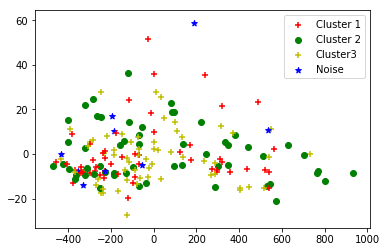

In [150]:
from sklearn.decomposition import PCA
import pylab as pl
# Use principal component to condense the 13 features to 2 features
pca = PCA(n_components=2).fit(wine)
pca_2d = pca.transform(wine)
# Assign colors
for i in range(0, pca_2d.shape[0]):
  if labels[i] == 0:
    c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
  elif labels[i] == 1:
    c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
  elif labels[i] == 2:
    c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='y', marker='+')
  elif labels[i] == -1:
    c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
    
pl.legend([c1, c2, c3,c4], ['Cluster 1', 'Cluster 2','Cluster3','Noise'])
pl.show()

##### MeanShift


MeanShift is an intuitive, powerful non-parametric algorithm. It was invented long back in 1975 by Fukunaga and Hostetler but did not gain its popularity unill two papers applied the algorithm to Computer Vision. Inn contrast to the K-means clustering algorithm, the output of mean shift does not depend on any explicit assumptions on the shape of the point distribution, the number of clusters, or any form of random initialization.


[Comaniciu](http://comaniciu.net/Papers/MsRobustApproach.pdf)


<img src="MeanShift.png" alt="Drawing" style="width: 500px;"/>

How does it work? Mean shift first finds the centroid of a set of data points. Secondly it shifts the center of window towards the mean until it converges - thus the name *meanshift*. The algorithm iteratively assign each data point towards the closest cluster centroid. The figure below shows the process of the convergence.

<img src="Meanshift process all.png" alt="Drawing" style="width: 700px;"/>

The mean shift algorithm assumes that all points are sampled from some underlying probability density function (p.d.f.), with regions of high sample density corresponding to the local maxima of the distribution. This centroid-based approach computes the centroids of various regions in the dataset. Finally the algorithm settles with a few centroids the final clusters. How do we use Mean Shift for outlier dection? As in DBSCAN, data points far from the centroids can be ignored by the clustering process and thus flagged as outliers.

For the sake of visual presentation we generate 2-feature data points in the following example. Readers are encouraged to generate data with higher dimensions. We use make_blobs of sklearn.datasets. The default values are:
sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None). Make_blobs returns X, an array of shape [n_samples, n_features] and y, the integer labels for cluster membership of each sample.

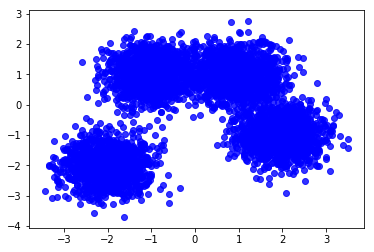

In [2]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
# Generate sample data
centers = [[1, 1], [-2, -2], [2, -1],[-1,1]]
X, y = make_blobs(n_samples=5000, centers=centers, cluster_std=.5)
plt.scatter(X[:,0],X[:,1], c='b', alpha=0.8)
plt.show()

The mean shift algorithm requires the bandwidth parameter, which is detected by the  estimate_bandwidth statement below. The parameter "quantile" should be between [0, 1].  0.5 means that the median of all pairwise distances is used. For large datasets, sklearn suggests setting the quantile parameter to a small value.

In [3]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=.2, n_samples=1000)
bandwidth

1.1475698684165492

We then store the parameters in 'ms'. It models the data when we use the 'fit()' function.

In [28]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
# store the cluster labels in 'labels'
labels = ms.labels_
labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

# store the centroids of the clusters in cluster_centers
cluster_centers = ms.cluster_centers_
cluster_centers

array([[-0.92462193,  0.99221165],
       [ 0.9137825 ,  0.98360627],
       [ 1.94640909, -0.99184981],
       [-2.00705545, -2.01315787]])

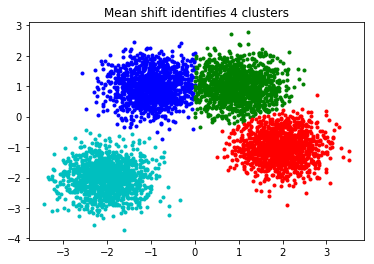

In [29]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmyk')
for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    # Plot the data points by using the character '.' for the point marker.
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
plt.title('Mean shift identifies %d' % n_clusters +' clusters')
plt.show()

In [25]:
Xy=pd.DataFrame(X,columns=('x1','x2'))
labels=pd.Series(labels,name='label')
Xy=pd.concat((Xy,labels),axis=1)
Xy.head()

,x1,x2,label
0,-2.736426,-2.404392,3
1,1.905818,-0.351106,2
2,0.471411,1.300613,1
3,0.884055,-0.222943,1
4,-0.831231,1.010406,0


// http://blog.yhat.com/posts/self-organizing-maps-1.html